<header style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</header>

<h1>Lecture 01: Introduction</h1>

Associated Textbook Sections: [1.0, 1.1, 1.2, 1.3](https://inferentialthinking.com/chapters/01/what-is-data-science.html)

<h2>Fall 2022 Staff</h2>



<ul>
    <li>Instructor: Shawn Wiggins</li>  
    <li>Teaching Assistant (CRN 70949): Sophia Sun</li>
    <li>Tutors: Jesús Flores Sanchez, Mischa Skeeter, and Sophia Sun.</li>
    <li>Support Tutors: Charles Hutchins, Ed Lee</li>
    <li>Support Instructors: Amy McLanahan, Kimberly Hicks</li>
</ul>

<h2>What is Data Science?</h2>

Learning about the world from data using computation:
<ul>
    <li>Exploration</li>
        <ul>
            <li>Identifying patterns in data</li>
            <li>Uses visualizations</li>
        </ul>
    <li>Inference</li>
        <ul>
            <li>Using data to draw reliable conclusions about the group the data originated from</li>
            <li>Uses statistics</li>
        </ul>
    <li>Prediction</li>
        <ul>
            <li>Making informed guesses about unobserved data</li>
            <li>Uses machine learning</li>
        </ul>
</ul>

<h2>Course Syllabus</h2>

<a href="https://ccsf.instructure.com">https://ccsf.instructure.com/</a>

<h2>Jupyter Notebooks</h2>

Jupyter notebooks are a web application that allow you to:
<ul>
    <li>develop and run computer-interpreted code</li>
    <li>engage with and produce human-focused documentation</li>
    <li>support repoducable science</li>
    <li>and more!</li>
</ul>

<h3>Notebook Cells</h3>

You'll learn a lot about notebooks throughout the semester, but the main building block of a notebook is called a cell. There are two basic types of cells:
<ul>
    <li>Code cells</li>
    <li>Markdown (text) cells</li>
</ul>

<h4>A Code Cell</h4>

In [ ]:
# This is a code cell that prints out some text

print('Hello, MATH 108!')

<h4>A Markdown Cell</h4>

* All the formated text is contained in a Markdown cell. 
* You can double click these cells to edit them. 
* Markdown is a markup language that allows you to type as if you were using a basic text editor, but you have a few formatting features such as:
    * **bold**, 
    * *italic*, 
    * etc.
* There is a straightforward [Markdown guide](https://www.markdownguide.org/basic-syntax/) that shows you have to do all the basic formatting. 

<h2>A Literary Exploration</h2>

The following code contains things I'll use to run this demonstration. You don't have to understand how this works or change it for now.


In [71]:
# The typical setup for the notebooks in this course
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)

# A function to read the text files
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

<h3>Python "Reads" Two Books</h3>

Load the text from the Adventures of Huckleberry Finn and Little Women.

In [87]:
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

<h3>Adventures of Huckleberry Finn</h3>

View the Initial Contents of Chapter 1

In [76]:
huck_finn_chapters[0][:100]

"I. YOU don't know about me without you have read a book by the name of The Adventures of Tom Sawyer;"

Organizing all the Chapter Text in a Table

In [74]:
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Count the number of times "Tom" and "Jim" appear in the text.

In [7]:
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [8]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

Create a table called `counts` that organizes the number of times the names Jim, Tom, and Huck appear in each chapter.

In [67]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


Visualize the counts.

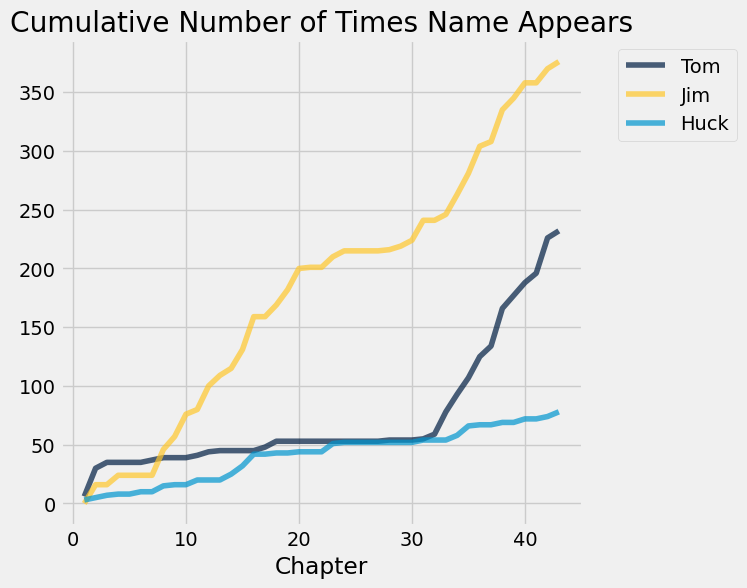

In [77]:
original_labels =  list(counts.labels)
cumulative_values = [np.cumsum(counts.column(index)) for index in np.arange(counts.num_columns)]
cumulative_counts = counts.with_columns(zip(original_labels, cumulative_values)).with_column('Chapter', np.arange(1, 44, 1))
cumulative_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

<h3>Little Women</h3>

Organize the Content of the Chapters of Little Women

In [78]:
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


Count the names in the chapters of Little Women.

In [79]:
people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


Plot the cumulative counts.

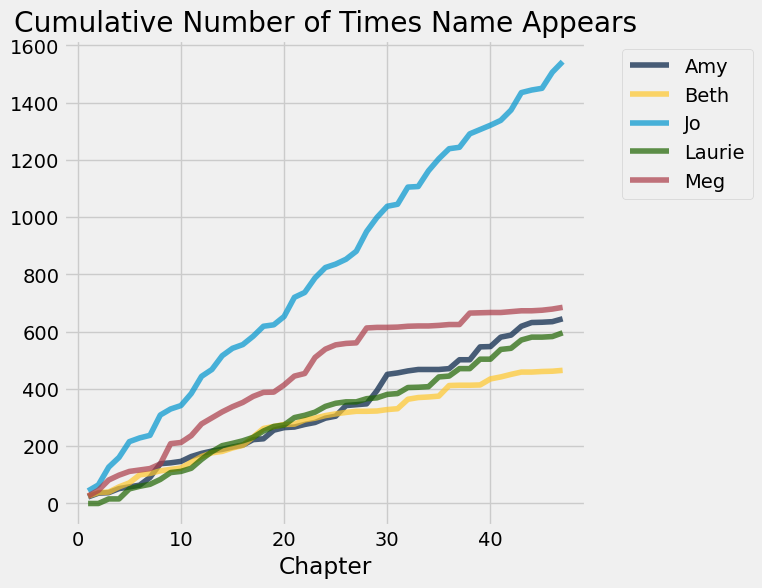

In [82]:
original_labels =  list(counts.labels)
cumulative_values = [np.cumsum(counts.column(index)) for index in np.arange(counts.num_columns)]
cumulative_counts = counts.with_columns(zip(original_labels, cumulative_values)).with_column('Chapter', np.arange(1, 48, 1))
cumulative_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

In each chapter, count the number of all characters call this the "length" of the chapter" Also, count the number periods in each chapter.

In [83]:
chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

Notice that there is no output here. 🧐

Show the counts for Huckleberry Finn

In [84]:
chars_periods_hf

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


Show the counts for Little Women

In [85]:
chars_periods_lw

LW Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


Visualize the relationship betwen the length of a chapter and the number of periods in a chapter.

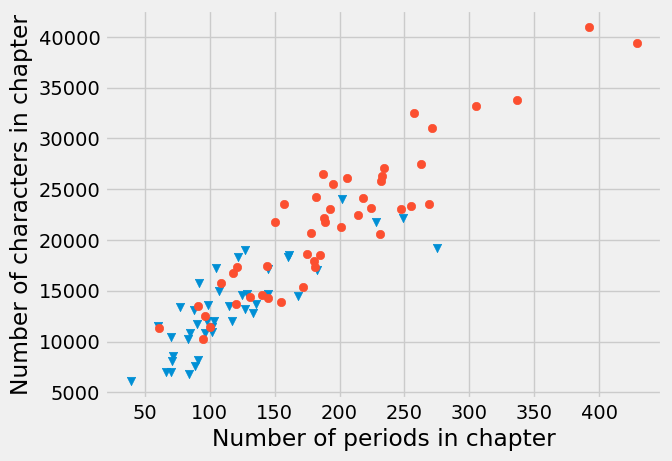

In [86]:
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], marker='v')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0])
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

<footer>
    <hr>
    <p>Adopted from <a href="https://data.berkeley.edu/education/courses/data-8">UC Berkeley DATA 8</a> course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>